In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
#progress bar
from tqdm.notebook import tqdm
import os

!pip install lasio[all]

import lasio

# set the working directory
os.chdir('C:\\Users\ctspa\\Documents\\2021DataThon\\Competition')

In [2]:
# get the data directories
dir_duvernay = 'Duvernay/Duvernay/'

In [3]:
# read in the well header files
Duv_Head = pd.read_excel(dir_duvernay+'Duvernay well headers SPE April 21 2021 .xlsx')
display(Duv_Head.head())

,UWI,Elevation Meters,ElevationDatum,TD meters,SurfaceLatitude_NAD83,SurfaceLongitude_NAD83,BottomLatitude_NAD83,BottomLongitude_NAD83,SurfaceLatitude_NAD27,SurfaceLongitude_NAD27,BottomLatitude_NAD27,BottomLongitude_NAD27
0,100072507623W500,555.7,KB,2545.0,55.613640,-117.423800,55.613640,-117.423800,55.613640,-117.423800,55.613640,-117.423800
1,100062007823W500,560.9,KB,2430.0,55.770872,-117.537674,55.770872,-117.537674,55.770872,-117.537674,55.770872,-117.537674
2,100052107723W500,558.4,KB,2515.5,55.683723,-117.516168,55.683723,-117.516168,55.683723,-117.516168,55.683723,-117.516168
3,100061307518W500,631.4,KB,2411.0,55.494600,-116.653606,55.494600,-116.653606,55.494600,-116.653606,55.494600,-116.653606
4,100070907618W500,627.0,KB,2408.0,55.566965,-116.726243,55.566965,-116.726243,55.566965,-116.726243,55.566965,-116.726243


In [4]:
display(Duv_Head.columns)

Index(['UWI ', 'Elevation Meters', 'ElevationDatum', 'TD meters ',
       'SurfaceLatitude_NAD83', 'SurfaceLongitude_NAD83',
       'BottomLatitude_NAD83', 'BottomLongitude_NAD83',
       'SurfaceLatitude_NAD27', 'SurfaceLongitude_NAD27',
       'BottomLatitude_NAD27', 'BottomLongitude_NAD27'],
      dtype='object')

In [5]:
print(Duv_Head.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UWI                     512 non-null    object 
 1   Elevation Meters        512 non-null    float64
 2   ElevationDatum          512 non-null    object 
 3   TD meters               512 non-null    float64
 4   SurfaceLatitude_NAD83   512 non-null    float64
 5   SurfaceLongitude_NAD83  512 non-null    float64
 6   BottomLatitude_NAD83    512 non-null    float64
 7   BottomLongitude_NAD83   512 non-null    float64
 8   SurfaceLatitude_NAD27   512 non-null    float64
 9   SurfaceLongitude_NAD27  512 non-null    float64
 10  BottomLatitude_NAD27    512 non-null    float64
 11  BottomLongitude_NAD27   512 non-null    float64
dtypes: float64(10), object(2)
memory usage: 48.1+ KB
None


In [6]:
# read in the DST BHT file
Duv_BHT = pd.read_excel(dir_duvernay+'Duvernay DST BHT for SPE April 20 2021.xlsx')
display(Duv_BHT.head())

,Well ID,DST Start Depth (MD) (m),DST End Depth (MD) (m),DST Bottom Hole Temp. (degC),DST Test Date,Test Type,DST Misrun,DST Number,Formation DSTd,Unnamed: 9,elevation M above sea level,UWI
0,100010107020W500,1410.6,1423.4,48.33,26025,DST,N,2,TRmontney,NaN,701.0,100010107020W500
1,100010608109W500,1686.0,1694.0,34.26,33647,DST,N,1,Dmuskeg,NaN,645.6,100010608109W500
2,100010904012W500,3698.0,3718.0,104.40,30798,LRT,N,1,Melkton,NaN,1283.8,100010904012W500
3,100011206021W400,822.0,825.0,29.00,29543,DST,N,4,Dwintrbrn,NaN,651.6,100011206021W400
4,100011506915W500,1801.0,1818.0,64.00,30760,DST,N,4,Dwabamun,NaN,873.1,100011506915W500


In [7]:
Duv_BHT.columns

Index(['Well ID', 'DST Start Depth (MD) (m)', 'DST End Depth (MD) (m)',
       'DST Bottom Hole Temp. (degC)', 'DST Test Date', 'Test Type',
       'DST Misrun', 'DST Number', 'Formation DSTd', 'Unnamed: 9',
       'elevation M above sea level', 'UWI'],
      dtype='object')

In [8]:
print(Duv_BHT.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Well ID                       512 non-null    object 
 1   DST Start Depth (MD) (m)      512 non-null    float64
 2   DST End Depth (MD) (m)        512 non-null    float64
 3   DST Bottom Hole Temp. (degC)  512 non-null    float64
 4   DST Test Date                 512 non-null    int64  
 5   Test Type                     512 non-null    object 
 6   DST Misrun                    512 non-null    object 
 7   DST Number                    512 non-null    int64  
 8   Formation DSTd                512 non-null    object 
 9   Unnamed: 9                    0 non-null      float64
 10  elevation M above sea level   512 non-null    float64
 11  UWI                           512 non-null    object 
dtypes: float64(5), int64(2), object(5)
memory usage: 48.1+ KB
None


In [9]:
# need to drop 

In [10]:
# read in the production summary file
Duv_Prd = pd.read_excel(dir_duvernay+'SPE Duvernay production summary April 20 2021.xlsx')
Duv_Prd.head()

,API,Measured Depth (ft),Total Vertical Depth (ft),Spud Date,Completion Date,First Production Month,Elevation,Oil Total Cum (bbl),Gas Total Cum (mcf),Water Total Cum (bbl),...,Elevation Ground (ft),Elevation Kelly Bushing (ft),Last Production Month,Gas Maximum (mcf),Gas Maximum Date,Oil Maximum (bbl),Oil Maximum Date,Water Maximum (bbl),Water Maximum Date,Yield Total Average
0,100010107020W500,9081,9081,1971-03-11,NaT,NaT,2287 GL,NaN,NaN,NaN,...,2287,2300,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN
1,100010608109W500,5725,5725,1992-02-03,1993-01-18,1992-05-01,2103 GL,3422.286,2722.761,390.597,...,2103,2119,1992-08-01,1084.16,1992-07-01,1639.125,1992-05-01,351.6,1992-05-01,1256.918
2,100010904012W500,15797,15797,1983-12-29,NaT,NaT,4186 GL,NaN,NaN,NaN,...,4186,4213,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN
3,100011206021W400,4895,4895,1980-11-03,NaT,NaT,2123 GL,NaN,NaN,NaN,...,2123,2139,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN
4,100011506915W500,8891,8891,1984-02-21,NaT,NaT,2844 GL,NaN,NaN,NaN,...,2844,2864,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN


In [11]:
Duv_Prd.columns

Index(['API   ', 'Measured Depth (ft)   ', 'Total Vertical Depth (ft)   ',
       'Spud Date   ', 'Completion Date   ', 'First Production Month   ',
       'Elevation   ', 'Oil Total Cum (bbl)   ', 'Gas Total Cum (mcf)   ',
       'Water Total Cum (bbl)   ', 'GOR Total Average   ', 'Plug Date   ',
       'First Production Date   ', 'Elevation Drill Floor (ft)   ',
       'Elevation Ground (ft)   ', 'Elevation Kelly Bushing (ft)   ',
       'Last Production Month   ', 'Gas Maximum (mcf)   ',
       'Gas Maximum Date   ', 'Oil Maximum (bbl)   ', 'Oil Maximum Date   ',
       'Water Maximum (bbl)   ', 'Water Maximum Date   ',
       'Yield Total Average   '],
      dtype='object')

In [12]:
# try to get rid of the rows with no production information
Duv_Prd.dropna(inplace=True,thresh=10)
Duv_Prd.head()

,API,Measured Depth (ft),Total Vertical Depth (ft),Spud Date,Completion Date,First Production Month,Elevation,Oil Total Cum (bbl),Gas Total Cum (mcf),Water Total Cum (bbl),...,Elevation Ground (ft),Elevation Kelly Bushing (ft),Last Production Month,Gas Maximum (mcf),Gas Maximum Date,Oil Maximum (bbl),Oil Maximum Date,Water Maximum (bbl),Water Maximum Date,Yield Total Average
1,100010608109W500,5725,5725,1992-02-03,1993-01-18,1992-05-01,2103 GL,3422.286,2722.761,390.597,...,2103,2119,1992-08-01,1084.160,1992-07-01,1639.125,1992-05-01,351.600,1992-05-01,1256.918
7,100012306427W500,13123,13123,1995-03-02,2018-07-18,1995-06-01,3127 GL,30698.050,71363.879,6.919,...,3127,3150,1995-10-01,47869.031,1995-08-01,20140.603,1995-08-01,5.032,1995-10-01,430.162
18,100020403021W400,7159,7159,1964-02-27,1967-08-16,1964-04-01,2290 GL,3858.799,3058.250,4926.809,...,2290,2303,1964-09-01,1137.132,1964-05-01,1531.569,1964-05-01,2163.066,1964-08-01,1261.767
21,100020606512W500,9226,9226,1976-02-26,2014-11-10,1977-03-01,3409 GL,7967.932,3905.801,2256.153,...,3409,3422,1979-08-01,727.482,1978-06-01,1103.233,1978-06-01,1291.927,1979-08-01,2040.025
22,100020807907W500,5689,5689,1982-11-22,2012-12-05,1983-02-01,2149 GL,678969.348,227694.849,164059.647,...,2149,2162,1999-03-01,2468.495,1995-05-01,6402.398,1994-10-01,3910.375,1999-01-01,2981.927


In [13]:
Duv_Prd.columns

Index(['API   ', 'Measured Depth (ft)   ', 'Total Vertical Depth (ft)   ',
       'Spud Date   ', 'Completion Date   ', 'First Production Month   ',
       'Elevation   ', 'Oil Total Cum (bbl)   ', 'Gas Total Cum (mcf)   ',
       'Water Total Cum (bbl)   ', 'GOR Total Average   ', 'Plug Date   ',
       'First Production Date   ', 'Elevation Drill Floor (ft)   ',
       'Elevation Ground (ft)   ', 'Elevation Kelly Bushing (ft)   ',
       'Last Production Month   ', 'Gas Maximum (mcf)   ',
       'Gas Maximum Date   ', 'Oil Maximum (bbl)   ', 'Oil Maximum Date   ',
       'Water Maximum (bbl)   ', 'Water Maximum Date   ',
       'Yield Total Average   '],
      dtype='object')

In [14]:
# drop the columns with superfluous data
Duv_Prd.drop(columns=['Measured Depth (ft)   ', 'Total Vertical Depth (ft)   ', 'Plug Date   ', 'Elevation   ', 
                      'Elevation Drill Floor (ft)   ', 'Elevation Ground (ft)   ', 'GOR Total Average   ',
                      'Completion Date   ', 'Elevation Kelly Bushing (ft)   ', 'Yield Total Average   ',
                      'First Production Date   '],inplace=True)

In [15]:
Duv_Prd.columns

Index(['API   ', 'Spud Date   ', 'First Production Month   ',
       'Oil Total Cum (bbl)   ', 'Gas Total Cum (mcf)   ',
       'Water Total Cum (bbl)   ', 'Last Production Month   ',
       'Gas Maximum (mcf)   ', 'Gas Maximum Date   ', 'Oil Maximum (bbl)   ',
       'Oil Maximum Date   ', 'Water Maximum (bbl)   ',
       'Water Maximum Date   '],
      dtype='object')

In [16]:
# Clean up the names
Duv_Prd.rename(columns={'API   ':"UWI", 'Spud Date   ':"Spud Date", 'Completion Date   ':"Completion Date",
       'First Production Month   ':"OnPrdMonth", 'Oil Total Cum (bbl)   ':"CumOIl(bbl)",
       'Gas Total Cum (mcf)   ':"CumGas(mcf)", 'Water Total Cum (bbl)   ':"CumWtr(bbl)",
       'GOR Total Average   ':"GOR", 'Plug Date   ': "Plug Date", 'First Production Date   ':"OnPrdDate",
       'Last Production Month   ':"OffPrdMonth", 'Gas Maximum (mcf)   ':"MaxGas(mcf/d)",
       'Gas Maximum Date   ':"MaxGasDate", 'Oil Maximum (bbl)   ':"MaxOil(bbl/d)", 'Oil Maximum Date   ':"MaxOilDate",
       'Water Maximum (bbl)   ':"MaxWtr", 'Water Maximum Date   ':"MaxWtrDate",
       'Yield Total Average   ':"AvgYield"}, inplace=True)

In [17]:
Duv_Prd.columns

Index(['UWI', 'Spud Date', 'OnPrdMonth', 'CumOIl(bbl)', 'CumGas(mcf)',
       'CumWtr(bbl)', 'OffPrdMonth', 'MaxGas(mcf/d)', 'MaxGasDate',
       'MaxOil(bbl/d)', 'MaxOilDate', 'MaxWtr', 'MaxWtrDate'],
      dtype='object')

In [18]:
# now read in the true temperature 
Duv_TrueTemp = pd.read_excel(dir_duvernay+'Duvenay TrueTemp_Train.xlsx')
Duv_TrueTemp.head()

,UWI,Depths subsea (m),True Temperature (oC)
0,100010107020W500,-720,2.53
1,100010107020W500,-700,2.54
2,100010107020W500,-680,2.54
3,100010107020W500,-660,3.30
4,100010107020W500,-640,4.06


In [19]:
# put together the well head file with the DST BHT file
Duv_Head_BHT=pd.merge(Duv_Head,Duv_BHT,how="inner",left_on="UWI ",right_on="Well ID",sort=False)
Duv_Head_BHT.head()

,UWI,Elevation Meters,ElevationDatum,TD meters,SurfaceLatitude_NAD83,SurfaceLongitude_NAD83,BottomLatitude_NAD83,BottomLongitude_NAD83,SurfaceLatitude_NAD27,SurfaceLongitude_NAD27,...,DST End Depth (MD) (m),DST Bottom Hole Temp. (degC),DST Test Date,Test Type,DST Misrun,DST Number,Formation DSTd,Unnamed: 9,elevation M above sea level,UWI
0,100072507623W500,555.7,KB,2545.0,55.613640,-117.423800,55.613640,-117.423800,55.613640,-117.423800,...,2501.5,81.0,37687,LRT,N,1,Dgilwood,NaN,555.7,100072507623W500
1,100062007823W500,560.9,KB,2430.0,55.770872,-117.537674,55.770872,-117.537674,55.770872,-117.537674,...,1878.0,18.0,31228,LRT,Y,13,Dwabamun,NaN,560.9,100062007823W500
2,100052107723W500,558.4,KB,2515.5,55.683723,-117.516168,55.683723,-117.516168,55.683723,-117.516168,...,1163.0,37.7,36684,DST,Y,2,Mdebolt,NaN,558.4,100052107723W500
3,100061307518W500,631.4,KB,2411.0,55.494600,-116.653606,55.494600,-116.653606,55.494600,-116.653606,...,871.5,35.5,29993,DST,N,2,Kgething,NaN,631.4,100061307518W500
4,100070907618W500,627.0,KB,2408.0,55.566965,-116.726243,55.566965,-116.726243,55.566965,-116.726243,...,971.0,31.0,30005,DST,N,2,PRbelloy,NaN,627.0,100070907618W500


In [20]:
Duv_Head_BHT.columns

Index(['UWI ', 'Elevation Meters', 'ElevationDatum', 'TD meters ',
       'SurfaceLatitude_NAD83', 'SurfaceLongitude_NAD83',
       'BottomLatitude_NAD83', 'BottomLongitude_NAD83',
       'SurfaceLatitude_NAD27', 'SurfaceLongitude_NAD27',
       'BottomLatitude_NAD27', 'BottomLongitude_NAD27', 'Well ID',
       'DST Start Depth (MD) (m)', 'DST End Depth (MD) (m)',
       'DST Bottom Hole Temp. (degC)', 'DST Test Date', 'Test Type',
       'DST Misrun', 'DST Number', 'Formation DSTd', 'Unnamed: 9',
       'elevation M above sea level', 'UWI'],
      dtype='object')

In [21]:
# drop the columns with all the useless data
Duv_MeasTemp=Duv_Head_BHT.drop(columns=['ElevationDatum','SurfaceLatitude_NAD27', 'SurfaceLongitude_NAD27',
       'BottomLatitude_NAD27', 'BottomLongitude_NAD27', 'Well ID','Test Type',
       'DST Misrun', 'DST Number', 'Formation DSTd', 'Unnamed: 9',
       'elevation M above sea level', 'UWI'])
Duv_MeasTemp.head()

,UWI,Elevation Meters,TD meters,SurfaceLatitude_NAD83,SurfaceLongitude_NAD83,BottomLatitude_NAD83,BottomLongitude_NAD83,DST Start Depth (MD) (m),DST End Depth (MD) (m),DST Bottom Hole Temp. (degC),DST Test Date
0,100072507623W500,555.7,2545.0,55.613640,-117.423800,55.613640,-117.423800,2495.5,2501.5,81.0,37687
1,100062007823W500,560.9,2430.0,55.770872,-117.537674,55.770872,-117.537674,1840.0,1878.0,18.0,31228
2,100052107723W500,558.4,2515.5,55.683723,-117.516168,55.683723,-117.516168,1154.0,1163.0,37.7,36684
3,100061307518W500,631.4,2411.0,55.494600,-116.653606,55.494600,-116.653606,862.0,871.5,35.5,29993
4,100070907618W500,627.0,2408.0,55.566965,-116.726243,55.566965,-116.726243,935.0,971.0,31.0,30005


In [22]:
# rename the columns to somethign tha makes sense
Duv_MeasTemp.rename(columns={"UWI ":"UWI","Elevation Meters":"Ele(m)","TD meters ":"TD(m)",
                             "SurfaceLatitude_NAD83":"TopLat","SurfaceLongitude_NAD83":"TopLon",
                             "BottomLatitude_NAD83":"BotLat","BottomLongitude_NAD83":"BotLon",
                             "DST Start Depth (MD) (m)":"DSTTop(m)","DST End Depth (MD) (m)":"DSTBot(m)",
                             "DST Bottom Hole Temp. (degC)":"DSTTemp(oC)","DST Test Date":"DSTDate"},inplace=True)
Duv_MeasTemp.head()

,UWI,Ele(m),TD(m),TopLat,TopLon,BotLat,BotLon,DSTTop(m),DSTBot(m),DSTTemp(oC),DSTDate
0,100072507623W500,555.7,2545.0,55.613640,-117.423800,55.613640,-117.423800,2495.5,2501.5,81.0,37687
1,100062007823W500,560.9,2430.0,55.770872,-117.537674,55.770872,-117.537674,1840.0,1878.0,18.0,31228
2,100052107723W500,558.4,2515.5,55.683723,-117.516168,55.683723,-117.516168,1154.0,1163.0,37.7,36684
3,100061307518W500,631.4,2411.0,55.494600,-116.653606,55.494600,-116.653606,862.0,871.5,35.5,29993
4,100070907618W500,627.0,2408.0,55.566965,-116.726243,55.566965,-116.726243,935.0,971.0,31.0,30005


In [23]:
print(Duv_MeasTemp.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 512 entries, 0 to 511
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   UWI          512 non-null    object 
 1   Ele(m)       512 non-null    float64
 2   TD(m)        512 non-null    float64
 3   TopLat       512 non-null    float64
 4   TopLon       512 non-null    float64
 5   BotLat       512 non-null    float64
 6   BotLon       512 non-null    float64
 7   DSTTop(m)    512 non-null    float64
 8   DSTBot(m)    512 non-null    float64
 9   DSTTemp(oC)  512 non-null    float64
 10  DSTDate      512 non-null    int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 48.0+ KB
None


In [24]:
# check which wells will not be used for testing (that is validation by SPE)
set_assign=pd.read_csv("set_assign.csv")
# and merge with the head and BHT file to check which wells belong where 
Duv_MT_Set=pd.merge(Duv_MeasTemp,set_assign,how="inner",left_on="UWI",right_on="UWI",sort=False)
Duv_MT_Set.head()

,UWI,Ele(m),TD(m),TopLat,TopLon,BotLat,BotLon,DSTTop(m),DSTBot(m),DSTTemp(oC),DSTDate,Set
0,100072507623W500,555.7,2545.0,55.613640,-117.423800,55.613640,-117.423800,2495.5,2501.5,81.0,37687,Training
1,100062007823W500,560.9,2430.0,55.770872,-117.537674,55.770872,-117.537674,1840.0,1878.0,18.0,31228,Training
2,100052107723W500,558.4,2515.5,55.683723,-117.516168,55.683723,-117.516168,1154.0,1163.0,37.7,36684,Validation_Testing
3,100061307518W500,631.4,2411.0,55.494600,-116.653606,55.494600,-116.653606,862.0,871.5,35.5,29993,Training
4,100070907618W500,627.0,2408.0,55.566965,-116.726243,55.566965,-116.726243,935.0,971.0,31.0,30005,Training


In [25]:
print(Duv_MT_Set.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 0 to 498
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   UWI          499 non-null    object 
 1   Ele(m)       499 non-null    float64
 2   TD(m)        499 non-null    float64
 3   TopLat       499 non-null    float64
 4   TopLon       499 non-null    float64
 5   BotLat       499 non-null    float64
 6   BotLon       499 non-null    float64
 7   DSTTop(m)    499 non-null    float64
 8   DSTBot(m)    499 non-null    float64
 9   DSTTemp(oC)  499 non-null    float64
 10  DSTDate      499 non-null    int64  
 11  Set          499 non-null    object 
dtypes: float64(9), int64(1), object(2)
memory usage: 50.7+ KB
None


In [26]:
Duv_MT_tra = Duv_MT_Set[Duv_MT_Set["Set"]=="Training"]
print(Duv_MT_tra.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 0 to 496
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   UWI          372 non-null    object 
 1   Ele(m)       372 non-null    float64
 2   TD(m)        372 non-null    float64
 3   TopLat       372 non-null    float64
 4   TopLon       372 non-null    float64
 5   BotLat       372 non-null    float64
 6   BotLon       372 non-null    float64
 7   DSTTop(m)    372 non-null    float64
 8   DSTBot(m)    372 non-null    float64
 9   DSTTemp(oC)  372 non-null    float64
 10  DSTDate      372 non-null    int64  
 11  Set          372 non-null    object 
dtypes: float64(9), int64(1), object(2)
memory usage: 37.8+ KB
None


In [27]:
Duv_MT_val = Duv_MT_Set[Duv_MT_Set["Set"]=="Validation_Testing"]
print(Duv_MT_val.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127 entries, 2 to 498
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   UWI          127 non-null    object 
 1   Ele(m)       127 non-null    float64
 2   TD(m)        127 non-null    float64
 3   TopLat       127 non-null    float64
 4   TopLon       127 non-null    float64
 5   BotLat       127 non-null    float64
 6   BotLon       127 non-null    float64
 7   DSTTop(m)    127 non-null    float64
 8   DSTBot(m)    127 non-null    float64
 9   DSTTemp(oC)  127 non-null    float64
 10  DSTDate      127 non-null    int64  
 11  Set          127 non-null    object 
dtypes: float64(9), int64(1), object(2)
memory usage: 12.9+ KB
None


In [28]:
Duv_MeasTemp_WithPrd=pd.merge(Duv_MeasTemp,Duv_Prd,on="UWI",sort=False)
Duv_MeasTemp_WithPrd.head()

,UWI,Ele(m),TD(m),TopLat,TopLon,BotLat,BotLon,DSTTop(m),DSTBot(m),DSTTemp(oC),...,CumOIl(bbl),CumGas(mcf),CumWtr(bbl),OffPrdMonth,MaxGas(mcf/d),MaxGasDate,MaxOil(bbl/d),MaxOilDate,MaxWtr,MaxWtrDate
0,100093308009W500,645.1,1805.0,55.980543,-115.335548,55.980543,-115.335548,1698.0,1701.5,50.00,...,446529.387,140817.234,189881.211,2002-06-01,4502.620,1988-03-01,12875.872,1987-08-01,6665.313,1989-05-01
1,100010608109W500,645.6,1745.0,55.987511,-115.390554,55.987511,-115.390554,1686.0,1694.0,34.26,...,3422.286,2722.761,390.597,1992-08-01,1084.160,1992-07-01,1639.125,1992-05-01,351.600,1992-05-01
2,100101408109W502,646.8,1815.1,56.025078,-115.287948,56.025078,-115.287948,524.3,527.9,31.11,...,144323.481,43963.233,83733.735,1986-06-01,1264.265,1978-01-01,4225.495,1979-03-01,2804.627,1982-08-01
3,100053408009W500,647.9,1800.0,55.975768,-115.326138,55.975768,-115.326138,1750.0,1755.0,44.00,...,252146.569,83095.408,842.212,2001-11-01,1246.608,1980-12-01,3411.593,1982-06-01,169.825,1991-11-01
4,100031508009W500,651.2,1816.0,55.928945,-115.325226,55.928945,-115.325226,1773.0,1789.0,44.00,...,493653.277,204125.848,1623489.493,2018-12-01,3739.823,2014-01-01,8832.781,1991-07-01,7591.173,1995-07-01


In [29]:
Duv_MTP_tra=pd.merge(Duv_MT_tra,Duv_Prd,on="UWI",sort=False)
Duv_MTP_tra.head()

,UWI,Ele(m),TD(m),TopLat,TopLon,BotLat,BotLon,DSTTop(m),DSTBot(m),DSTTemp(oC),...,CumOIl(bbl),CumGas(mcf),CumWtr(bbl),OffPrdMonth,MaxGas(mcf/d),MaxGasDate,MaxOil(bbl/d),MaxOilDate,MaxWtr,MaxWtrDate
0,100010608109W500,645.6,1745.0,55.987511,-115.390554,55.987511,-115.390554,1686.0,1694.0,34.26,...,3422.286,2722.761,390.597,1992-08-01,1084.160,1992-07-01,1639.125,1992-05-01,351.600,1992-05-01
1,100053408009W500,647.9,1800.0,55.975768,-115.326138,55.975768,-115.326138,1750.0,1755.0,44.00,...,252146.569,83095.408,842.212,2001-11-01,1246.608,1980-12-01,3411.593,1982-06-01,169.825,1991-11-01
2,100103008009W500,651.4,1720.0,55.965689,-115.393173,55.965689,-115.393173,1691.0,1701.0,47.00,...,6709.969,2595.629,18166.232,2008-05-01,822.832,2008-01-01,1746.051,2007-12-01,3905.973,2008-04-01
3,100073008009W500,652.2,1776.0,55.961351,-115.393171,55.961351,-115.393171,1747.0,1776.0,45.00,...,494086.024,251161.447,127822.788,2006-11-01,3669.194,1990-05-01,5031.849,1988-10-01,3525.439,2006-05-01
4,100022008108W500,653.4,1790.0,56.030551,-115.210209,56.030551,-115.210209,1734.0,1747.0,50.00,...,10848.036,1211.293,16576.796,1989-06-01,120.070,1987-11-01,797.548,1988-02-01,1117.070,1988-10-01


In [30]:
print(Duv_MTP_tra.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 117
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   UWI            118 non-null    object        
 1   Ele(m)         118 non-null    float64       
 2   TD(m)          118 non-null    float64       
 3   TopLat         118 non-null    float64       
 4   TopLon         118 non-null    float64       
 5   BotLat         118 non-null    float64       
 6   BotLon         118 non-null    float64       
 7   DSTTop(m)      118 non-null    float64       
 8   DSTBot(m)      118 non-null    float64       
 9   DSTTemp(oC)    118 non-null    float64       
 10  DSTDate        118 non-null    int64         
 11  Set            118 non-null    object        
 12  Spud Date      118 non-null    datetime64[ns]
 13  OnPrdMonth     118 non-null    datetime64[ns]
 14  CumOIl(bbl)    118 non-null    float64       
 15  CumGas(mcf)    118 non-

In [31]:
Duv_MTP_val=pd.merge(Duv_MT_val,Duv_Prd,on="UWI",sort=False)
Duv_MTP_tra.head()

,UWI,Ele(m),TD(m),TopLat,TopLon,BotLat,BotLon,DSTTop(m),DSTBot(m),DSTTemp(oC),...,CumOIl(bbl),CumGas(mcf),CumWtr(bbl),OffPrdMonth,MaxGas(mcf/d),MaxGasDate,MaxOil(bbl/d),MaxOilDate,MaxWtr,MaxWtrDate
0,100010608109W500,645.6,1745.0,55.987511,-115.390554,55.987511,-115.390554,1686.0,1694.0,34.26,...,3422.286,2722.761,390.597,1992-08-01,1084.160,1992-07-01,1639.125,1992-05-01,351.600,1992-05-01
1,100053408009W500,647.9,1800.0,55.975768,-115.326138,55.975768,-115.326138,1750.0,1755.0,44.00,...,252146.569,83095.408,842.212,2001-11-01,1246.608,1980-12-01,3411.593,1982-06-01,169.825,1991-11-01
2,100103008009W500,651.4,1720.0,55.965689,-115.393173,55.965689,-115.393173,1691.0,1701.0,47.00,...,6709.969,2595.629,18166.232,2008-05-01,822.832,2008-01-01,1746.051,2007-12-01,3905.973,2008-04-01
3,100073008009W500,652.2,1776.0,55.961351,-115.393171,55.961351,-115.393171,1747.0,1776.0,45.00,...,494086.024,251161.447,127822.788,2006-11-01,3669.194,1990-05-01,5031.849,1988-10-01,3525.439,2006-05-01
4,100022008108W500,653.4,1790.0,56.030551,-115.210209,56.030551,-115.210209,1734.0,1747.0,50.00,...,10848.036,1211.293,16576.796,1989-06-01,120.070,1987-11-01,797.548,1988-02-01,1117.070,1988-10-01


In [32]:
print(Duv_MTP_val.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 0 to 34
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   UWI            35 non-null     object        
 1   Ele(m)         35 non-null     float64       
 2   TD(m)          35 non-null     float64       
 3   TopLat         35 non-null     float64       
 4   TopLon         35 non-null     float64       
 5   BotLat         35 non-null     float64       
 6   BotLon         35 non-null     float64       
 7   DSTTop(m)      35 non-null     float64       
 8   DSTBot(m)      35 non-null     float64       
 9   DSTTemp(oC)    35 non-null     float64       
 10  DSTDate        35 non-null     int64         
 11  Set            35 non-null     object        
 12  Spud Date      35 non-null     datetime64[ns]
 13  OnPrdMonth     35 non-null     datetime64[ns]
 14  CumOIl(bbl)    35 non-null     float64       
 15  CumGas(mcf)    35 non-nul

In [33]:
print(Duv_MeasTemp_WithPrd.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 0 to 154
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   UWI            155 non-null    object        
 1   Ele(m)         155 non-null    float64       
 2   TD(m)          155 non-null    float64       
 3   TopLat         155 non-null    float64       
 4   TopLon         155 non-null    float64       
 5   BotLat         155 non-null    float64       
 6   BotLon         155 non-null    float64       
 7   DSTTop(m)      155 non-null    float64       
 8   DSTBot(m)      155 non-null    float64       
 9   DSTTemp(oC)    155 non-null    float64       
 10  DSTDate        155 non-null    int64         
 11  Spud Date      155 non-null    datetime64[ns]
 12  OnPrdMonth     155 non-null    datetime64[ns]
 13  CumOIl(bbl)    155 non-null    float64       
 14  CumGas(mcf)    155 non-null    float64       
 15  CumWtr(bbl)    155 non-

In [34]:
# Now we need a file with relevant depths in _SS(m) and drop everything else for now
Duv_Check=pd.DataFrame()
Duv_Check["UWI"]=Duv_MT_tra["UWI"]
Duv_Check["TD_SS(m)"]=Duv_MT_tra["TD(m)"]-Duv_MT_tra["Ele(m)"]
Duv_Check["DSTTop_SS(m)"]=Duv_MT_tra["DSTTop(m)"]-Duv_MT_tra["Ele(m)"]
Duv_Check["DSTBot_SS(m)"]=Duv_MT_tra["DSTBot(m)"]-Duv_MT_tra["Ele(m)"]
Duv_Check.head()

,UWI,TD_SS(m),DSTTop_SS(m),DSTBot_SS(m)
0,100072507623W500,1989.3,1939.8,1945.8
1,100062007823W500,1869.1,1279.1,1317.1
3,100061307518W500,1779.6,230.6,240.1
4,100070907618W500,1781.0,308.0,344.0
5,100110407421W500,2001.6,444.3,452.8


In [35]:
print(Duv_Check.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 0 to 496
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   UWI           372 non-null    object 
 1   TD_SS(m)      372 non-null    float64
 2   DSTTop_SS(m)  372 non-null    float64
 3   DSTBot_SS(m)  372 non-null    float64
dtypes: float64(3), object(1)
memory usage: 14.5+ KB
None


In [36]:
Duv_TrueTemp.columns

Index(['UWI', 'Depths subsea (m)', 'True Temperature (oC)'], dtype='object')

In [37]:
Duv_TrueTemp.rename(columns={'Depths subsea (m)':"Depth(m)", 'True Temperature (oC)':"TrueTemp(oC)"}, inplace=True)
print(Duv_TrueTemp.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331021 entries, 0 to 331020
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   UWI           331021 non-null  object 
 1   Depth(m)      331021 non-null  int64  
 2   TrueTemp(oC)  331021 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 7.6+ MB
None


In [38]:
Duv_Check["DSTTop_SS(m)"]

0      1939.800000
1      1279.100000
3       230.600000
4       308.000000
5       444.300000
          ...     
491    2369.328248
492    1669.099970
494    2200.492788
495    2461.342004
496     430.343921
Name: DSTTop_SS(m), Length: 372, dtype: float64

In [39]:
Duv_Check["TD_SS(m)"]

0      1989.300000
1      1869.100000
3      1779.600000
4      1781.000000
5      2001.600000
          ...     
491    3430.157998
492    2825.619181
494    3170.523888
495    3021.045064
496    3265.460011
Name: TD_SS(m), Length: 372, dtype: float64

In [40]:
Duv_Check["UWI"]

0      100072507623W500
1      100062007823W500
3      100061307518W500
4      100070907618W500
5      100110407421W500
             ...       
491    100151004919W500
492    100041603305W500
494    100072103910W500
495    100110505718W500
496    102061504716W500
Name: UWI, Length: 372, dtype: object

In [41]:
Duv_Check

,UWI,TD_SS(m),DSTTop_SS(m),DSTBot_SS(m)
0,100072507623W500,1989.300000,1939.800000,1945.800000
1,100062007823W500,1869.100000,1279.100000,1317.100000
3,100061307518W500,1779.600000,230.600000,240.100000
4,100070907618W500,1781.000000,308.000000,344.000000
5,100110407421W500,2001.600000,444.300000,452.800000
...,...,...,...,...
491,100151004919W500,3430.157998,2369.328248,2379.928248
492,100041603305W500,2825.619181,1669.099970,1701.099970
494,100072103910W500,3170.523888,2200.492788,2244.392788
495,100110505718W500,3021.045064,2461.342004,2558.842004


In [42]:
Duv_Check.dropna()

,UWI,TD_SS(m),DSTTop_SS(m),DSTBot_SS(m)
0,100072507623W500,1989.300000,1939.800000,1945.800000
1,100062007823W500,1869.100000,1279.100000,1317.100000
3,100061307518W500,1779.600000,230.600000,240.100000
4,100070907618W500,1781.000000,308.000000,344.000000
5,100110407421W500,2001.600000,444.300000,452.800000
...,...,...,...,...
491,100151004919W500,3430.157998,2369.328248,2379.928248
492,100041603305W500,2825.619181,1669.099970,1701.099970
494,100072103910W500,3170.523888,2200.492788,2244.392788
495,100110505718W500,3021.045064,2461.342004,2558.842004


In [43]:
for wellname in Duv_Check["UWI"]:
    value =  Duv_TrueTemp[(wellname==Duv_TrueTemp["UWI"])]["Depth(m)"].max()
    Duv_Check.loc[Duv_Check["UWI"]==wellname, "MaxDepthTT"] = value    
    
Duv_Check.dropna(inplace=True)

In [44]:
Duv_Check.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 0 to 496
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   UWI           372 non-null    object 
 1   TD_SS(m)      372 non-null    float64
 2   DSTTop_SS(m)  372 non-null    float64
 3   DSTBot_SS(m)  372 non-null    float64
 4   MaxDepthTT    372 non-null    float64
dtypes: float64(4), object(1)
memory usage: 17.4+ KB


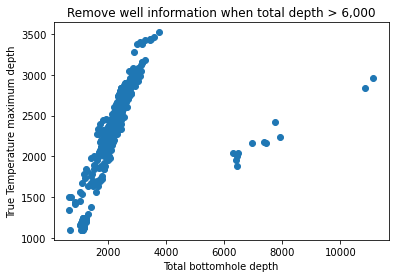

In [45]:
import matplotlib.pyplot as plt

x=Duv_Check["TD_SS(m)"]
y=Duv_Check["MaxDepthTT"]

plt.xlabel("Total bottomhole depth")
plt.ylabel("True Temperature maximum depth")
plt.title("Remove well information when total depth > 6,000")

plt.scatter(x, y)
plt.show()

In [46]:
Duv_Check[Duv_Check["TD_SS(m)"]>6000]

,UWI,TD_SS(m),DSTTop_SS(m),DSTBot_SS(m),MaxDepthTT
63,100020403021W400,6460.0,892.4,898.8,2040.0
97,100110406626W500,11135.5,1389.9,1425.0,2960.0
102,100082003821W400,6435.7,1090.6,1113.8,2000.0
115,100060603720W400,6395.9,779.4,785.5,1960.0
116,100023303322W400,6948.3,463.3,474.0,2160.0
122,100113603220W400,6425.1,1271.0,1282.0,1880.0
125,100061504803W500,7912.7,103.3,107.0,2240.0
147,100091703425W400,7758.2,789.8,830.9,2420.0
154,100103403221W400,6304.8,581.5,594.9,2040.0
157,100140103123W400,7422.4,468.2,470.6,2160.0


In [47]:
# drop the annoying values where measured depth is more thna 6,000m
indexnames = Duv_Check[(Duv_Check['TD_SS(m)'] > 6000)].index
Duv_Check.drop(indexnames,inplace=True)

In [48]:
Duv_Check

,UWI,TD_SS(m),DSTTop_SS(m),DSTBot_SS(m),MaxDepthTT
0,100072507623W500,1989.300000,1939.800000,1945.800000,1960.0
1,100062007823W500,1869.100000,1279.100000,1317.100000,1880.0
3,100061307518W500,1779.600000,230.600000,240.100000,1760.0
4,100070907618W500,1781.000000,308.000000,344.000000,1720.0
5,100110407421W500,2001.600000,444.300000,452.800000,2040.0
...,...,...,...,...,...
491,100151004919W500,3430.157998,2369.328248,2379.928248,3420.0
492,100041603305W500,2825.619181,1669.099970,1701.099970,2920.0
494,100072103910W500,3170.523888,2200.492788,2244.392788,3380.0
495,100110505718W500,3021.045064,2461.342004,2558.842004,2920.0


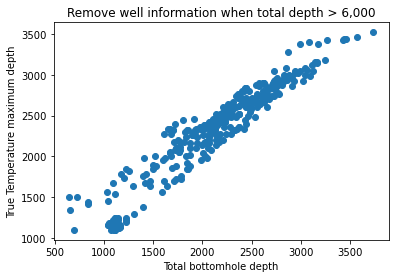

In [49]:
import matplotlib.pyplot as plt

x=Duv_Check["TD_SS(m)"]
y=Duv_Check["MaxDepthTT"]

plt.xlabel("Total bottomhole depth")
plt.ylabel("True Temperature maximum depth")
plt.title("Remove well information when total depth > 6,000")

plt.scatter(x, y)
plt.show()

In [50]:
Duv_MT_tra

,UWI,Ele(m),TD(m),TopLat,TopLon,BotLat,BotLon,DSTTop(m),DSTBot(m),DSTTemp(oC),DSTDate,Set
0,100072507623W500,555.700000,2545.000000,55.613640,-117.423800,55.613640,-117.423800,2495.5,2501.5,81.00,37687,Training
1,100062007823W500,560.900000,2430.000000,55.770872,-117.537674,55.770872,-117.537674,1840.0,1878.0,18.00,31228,Training
3,100061307518W500,631.400000,2411.000000,55.494600,-116.653606,55.494600,-116.653606,862.0,871.5,35.50,29993,Training
4,100070907618W500,627.000000,2408.000000,55.566965,-116.726243,55.566965,-116.726243,935.0,971.0,31.00,30005,Training
5,100110407421W500,638.700000,2640.300000,55.382733,-117.168626,55.382733,-117.168626,1083.0,1091.5,40.10,37611,Training
...,...,...,...,...,...,...,...,...,...,...,...,...
491,100151004919W500,1134.371752,4564.529750,53.219331,-116.692375,53.219331,-116.692375,3503.7,3514.3,117.78,26402,Training
492,100041603305W500,1147.000030,3972.619211,51.825629,-114.660282,51.825519,-114.660150,2816.1,2848.1,78.33,23208,Training
494,100072103910W500,1191.307212,4361.831100,52.368626,-115.378202,52.368626,-115.378202,3391.8,3435.7,107.22,25791,Training
495,100110505718W500,1193.257996,4214.303060,53.899156,-116.643824,53.899156,-116.643824,3654.6,3752.1,121.11,28352,Training


In [51]:
for wellname in Duv_Check["UWI"]:
# first we need to detemine relevant interval for DST and gradient at DST depth
#    display(wellname)
    topper = Duv_Check.loc[Duv_Check['UWI']==wellname, "DSTTop_SS(m)"].item() - 50
    bottom = Duv_Check.loc[Duv_Check['UWI']==wellname, "DSTBot_SS(m)"].item() + 50
    looker = Duv_TrueTemp[(wellname==Duv_TrueTemp["UWI"]) & 
            (topper < Duv_TrueTemp["Depth(m)"]) & 
            (Duv_TrueTemp["Depth(m)"] < bottom)]
    temp_trend = 100 * (looker["TrueTemp(oC)"].max()-looker["TrueTemp(oC)"].min()) / (looker["Depth(m)"].max()-looker["Depth(m)"].min())
    Duv_MT_tra.loc[Duv_MT_tra["UWI"]==wellname, "TGrad_DST"] = temp_trend
    righton = topper + (bottom-topper)/2
    TrueTempatDepth = looker["TrueTemp(oC)"].min() + (temp_trend / 100) * (righton - topper)
    Duv_MT_tra.loc[Duv_MT_tra["UWI"]==wellname, "TTC_DST"] = TrueTempatDepth
# second we need to determine relevant interval for TD and gradient at TD depth
    topper = Duv_Check.loc[Duv_Check['UWI']==wellname, "TD_SS(m)"].item() - 200
    bottom = Duv_Check.loc[Duv_Check['UWI']==wellname, "TD_SS(m)"].item() + 50
    if bottom > Duv_TrueTemp[(wellname==Duv_TrueTemp["UWI"])]["Depth(m)"].max():
        looker = Duv_TrueTemp[(wellname==Duv_TrueTemp["UWI"]) & 
            (topper < Duv_TrueTemp["Depth(m)"])]
#        display("inif")
    else:
        looker = Duv_TrueTemp[(wellname==Duv_TrueTemp["UWI"]) & 
            (topper < Duv_TrueTemp["Depth(m)"]) & 
            (Duv_TrueTemp["Depth(m)"] < bottom)]
#        display("outif")
    
    temp_trend = 100 * (looker["TrueTemp(oC)"].max()-looker["TrueTemp(oC)"].min()) / (looker["Depth(m)"].max()-looker["Depth(m)"].min())
    Duv_MT_tra.loc[Duv_MT_tra["UWI"]==wellname, "TGrad_TD"] = temp_trend
    righton = Duv_Check.loc[Duv_Check['UWI']==wellname, "TD_SS(m)"].item()
    TrueTempatDepth = looker["TrueTemp(oC)"].min() + (temp_trend / 100) * (righton - topper)
# third we need to determine TrueTemp at TD
    Duv_MT_tra.loc[Duv_MT_tra["UWI"]==wellname, "TTC_TD"] = TrueTempatDepth
    
    
    
Duv_MT_tra.head()

C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

,UWI,Ele(m),TD(m),TopLat,TopLon,BotLat,BotLon,DSTTop(m),DSTBot(m),DSTTemp(oC),DSTDate,Set,TGrad_DST,TTC_DST,TGrad_TD,TTC_TD
0,100072507623W500,555.7,2545.0,55.613640,-117.423800,55.613640,-117.423800,2495.5,2501.5,81.0,37687,Training,2.916667,82.415833,3.456250,84.002500
1,100062007823W500,560.9,2430.0,55.770872,-117.537674,55.770872,-117.537674,1840.0,1878.0,18.0,31228,Training,1.983333,66.668500,3.265000,81.250000
3,100061307518W500,631.4,2411.0,55.494600,-116.653606,55.494600,-116.653606,862.0,871.5,35.5,29993,Training,4.862500,43.132219,2.988889,82.937778
4,100070907618W500,627.0,2408.0,55.566965,-116.726243,55.566965,-116.726243,935.0,971.0,31.0,30005,Training,3.275000,45.947000,3.558333,84.586667
5,100110407421W500,638.7,2640.3,55.382733,-117.168626,55.382733,-117.168626,1083.0,1091.5,40.1,37611,Training,3.360000,51.602800,3.018182,91.336364


In [53]:
Duv_MT_tra["TGrad_TD"].describe()

count    359.000000
mean       3.057599
std        0.343037
min        2.272727
25%        2.817235
50%        2.988889
75%        3.284091
max        4.236364
Name: TGrad_TD, dtype: float64

In [55]:
looker = (Duv_MT_tra["TTC_DST"] / (Duv_MT_tra["DSTBot(m)"]-Duv_MT_tra["Ele(m)"])) 
looker.describe()

count    360.000000
mean       0.091931
std        0.435365
min       -1.190028
25%        0.058666
50%        0.068539
75%        0.085530
max        8.057013
dtype: float64

In [52]:
print(Duv_MT_tra.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 0 to 496
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   UWI          372 non-null    object 
 1   Ele(m)       372 non-null    float64
 2   TD(m)        372 non-null    float64
 3   TopLat       372 non-null    float64
 4   TopLon       372 non-null    float64
 5   BotLat       372 non-null    float64
 6   BotLon       372 non-null    float64
 7   DSTTop(m)    372 non-null    float64
 8   DSTBot(m)    372 non-null    float64
 9   DSTTemp(oC)  372 non-null    float64
 10  DSTDate      372 non-null    int64  
 11  Set          372 non-null    object 
 12  TGrad_DST    360 non-null    float64
 13  TTC_DST      360 non-null    float64
 14  TGrad_TD     359 non-null    float64
 15  TTC_TD       359 non-null    float64
dtypes: float64(13), int64(1), object(2)
memory usage: 49.4+ KB
None


In [53]:
Duv_MT_tra.dropna(inplace=True)
print(Duv_MT_tra.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359 entries, 0 to 496
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   UWI          359 non-null    object 
 1   Ele(m)       359 non-null    float64
 2   TD(m)        359 non-null    float64
 3   TopLat       359 non-null    float64
 4   TopLon       359 non-null    float64
 5   BotLat       359 non-null    float64
 6   BotLon       359 non-null    float64
 7   DSTTop(m)    359 non-null    float64
 8   DSTBot(m)    359 non-null    float64
 9   DSTTemp(oC)  359 non-null    float64
 10  DSTDate      359 non-null    int64  
 11  Set          359 non-null    object 
 12  TGrad_DST    359 non-null    float64
 13  TTC_DST      359 non-null    float64
 14  TGrad_TD     359 non-null    float64
 15  TTC_TD       359 non-null    float64
dtypes: float64(13), int64(1), object(2)
memory usage: 47.7+ KB
None


<ipython-input-53-9422cfe24f5f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Duv_MT_tra.dropna(inplace=True)


In [56]:
looker = (Duv_MT_tra["TTC_DST"] / (Duv_MT_tra["DSTBot(m)"]-Duv_MT_tra["Ele(m)"])) 
looker.describe()

count    360.000000
mean       0.091931
std        0.435365
min       -1.190028
25%        0.058666
50%        0.068539
75%        0.085530
max        8.057013
dtype: float64

In [54]:
print(Duv_MT_tra.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359 entries, 0 to 496
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   UWI          359 non-null    object 
 1   Ele(m)       359 non-null    float64
 2   TD(m)        359 non-null    float64
 3   TopLat       359 non-null    float64
 4   TopLon       359 non-null    float64
 5   BotLat       359 non-null    float64
 6   BotLon       359 non-null    float64
 7   DSTTop(m)    359 non-null    float64
 8   DSTBot(m)    359 non-null    float64
 9   DSTTemp(oC)  359 non-null    float64
 10  DSTDate      359 non-null    int64  
 11  Set          359 non-null    object 
 12  TGrad_DST    359 non-null    float64
 13  TTC_DST      359 non-null    float64
 14  TGrad_TD     359 non-null    float64
 15  TTC_TD       359 non-null    float64
dtypes: float64(13), int64(1), object(2)
memory usage: 47.7+ KB
None


In [55]:
Duv_MT_tra.describe()

,Ele(m),TD(m),TopLat,TopLon,BotLat,BotLon,DSTTop(m),DSTBot(m),DSTTemp(oC),DSTDate,TGrad_DST,TTC_DST,TGrad_TD,TTC_TD
count,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000
mean,848.898173,2976.785818,54.347316,-116.070046,54.347309,-116.070050,1955.456267,1975.629805,60.665599,27111.437326,3.321780,74.083774,3.057599,101.859432
std,142.332185,664.374378,0.897501,1.304457,0.897489,1.304460,691.175376,696.141722,21.852591,3950.369076,0.786614,20.623480,0.343037,17.484169
min,383.450980,1280.506810,51.655374,-118.575550,51.655235,-118.575550,216.400000,234.700000,10.000000,19665.000000,1.460000,9.055740,2.272727,56.772727
25%,747.119791,2702.260200,53.968044,-116.833609,53.968044,-116.833609,1520.200000,1530.250000,46.000000,23729.000000,2.872500,61.979850,2.817235,95.684091
50%,844.800000,3034.993170,54.462511,-116.354378,54.462511,-116.354378,1774.000000,1796.500000,57.600000,27286.000000,3.340000,69.807250,2.988889,103.956364
75%,944.841140,3423.321110,54.744246,-115.393172,54.744246,-115.393172,2418.100000,2431.200000,75.250000,29682.500000,3.872500,89.044044,3.284091,112.070227
max,1272.856079,4719.000000,56.030769,-111.499729,56.030769,-111.499729,3879.000000,4006.000000,135.560000,37913.000000,5.462500,129.317986,4.236364,146.695000


In [62]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [63]:
train_y = Duv_MT_tra["TTC_DST"]
train_x = Duv_MT_tra.drop(columns=["UWI","Set","TTC_TD","TTC_DST","TGrad_DST","TGrad_TD"])

X_train, X_test, y_train, y_test = train_test_split(train_x,train_y,test_size=0.4,random_state=42)

In [64]:
X_train

,Ele(m),TD(m),TopLat,TopLon,BotLat,BotLon,DSTTop(m),DSTBot(m),DSTTemp(oC),DSTDate
278,767.429281,3017.61900,54.539847,-116.808394,54.539847,-116.808394,1454.5,1460.0,50.00,21245
137,892.100000,3130.00000,54.426178,-116.583510,54.426178,-116.583510,1847.0,1855.0,94.00,31093
100,804.400000,2714.80000,53.516071,-114.719821,53.516071,-114.719821,1574.0,1578.0,43.00,30945
338,829.220364,3107.23314,54.258897,-116.468555,54.258897,-116.468555,1853.2,1877.9,52.22,28474
142,901.100000,2600.00000,51.779407,-113.313012,51.779407,-113.313012,2413.0,2427.0,73.10,31892
...,...,...,...,...,...,...,...,...,...,...
103,810.000000,3655.00000,54.624256,-117.791832,54.624256,-117.791832,1814.0,1833.0,59.40,29623
156,921.700000,3914.00000,54.499381,-117.838456,54.499614,-117.838404,2387.9,2392.9,69.00,34947
378,878.450228,3176.42501,54.317010,-116.558730,54.317010,-116.558730,3095.5,3109.0,91.11,27775
483,1064.329462,2988.35724,54.568695,-116.127632,54.568695,-116.127632,1746.5,1769.7,51.11,23027


In [65]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=21, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -11.071926 (5.438447)
ScaledLASSO: -13.542898 (6.740460)
ScaledEN: -31.620302 (18.272160)
ScaledKNN: -51.979415 (37.651972)
ScaledCART: -23.362282 (19.101986)
ScaledGBM: -9.165190 (7.796431)


In [66]:
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([50,100,200,300,400]))
model = GradientBoostingRegressor(random_state=21)
kfold = KFold(n_splits=10, random_state=21, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kfold)
grid_result = grid.fit(rescaledX, y_train)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

-10.297754 (8.926149) with: {'n_estimators': 50}
-9.172958 (7.568719) with: {'n_estimators': 100}
-8.966457 (6.881293) with: {'n_estimators': 200}
-8.966736 (6.757480) with: {'n_estimators': 300}
-8.987838 (6.762213) with: {'n_estimators': 400}
Best: -8.966457 using {'n_estimators': 200}


In [67]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error as mae

scaler = StandardScaler().fit(X_train)
rescaled_X_train = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=21, n_estimators=200)
model.fit(rescaled_X_train, y_train)

# transform the validation dataset
rescaled_X_test = scaler.transform(X_test)
predictions = model.predict(rescaled_X_test)
print (mean_squared_error(y_test, predictions))
print (mae(y_test, predictions))

7.962781353483681
2.09887274797774


In [63]:
X_val = Duv_MT_val.drop(columns=["UWI","Set"])


In [64]:
X_val

,Ele(m),TD(m),TopLat,TopLon,BotLat,BotLon,DSTTop(m),DSTBot(m),DSTTemp(oC),DSTDate
2,558.400000,2515.50000,55.683723,-117.516168,55.683723,-117.516168,1154.0,1163.0,37.70,36684
9,645.100000,1805.00000,55.980543,-115.335548,55.980543,-115.335548,1698.0,1701.5,50.00,31486
11,646.800000,1815.10000,56.025078,-115.287948,56.025078,-115.287948,524.3,527.9,31.11,28370
15,649.500000,1809.30000,56.045605,-115.197409,56.045605,-115.197409,1652.0,1677.9,44.44,24666
17,650.100000,1722.10000,55.964782,-115.316503,55.964782,-115.316503,545.0,560.2,34.44,25560
...,...,...,...,...,...,...,...,...,...,...
484,1064.872024,3576.94535,54.031160,-116.659823,54.031160,-116.659823,3441.2,3448.8,126.67,25313
487,1101.406550,4363.65996,52.720842,-115.806483,52.720842,-115.806483,3305.9,3310.7,103.33,25861
493,1154.315470,4114.93500,52.339173,-115.227785,52.339173,-115.227785,3566.2,3599.7,91.67,22161
497,1282.137544,4922.68150,52.889725,-116.183134,52.889725,-116.183134,3611.0,3619.2,93.33,27905


In [65]:
Rescaled_X_val = scaler.transform(X_val)

In [66]:
y_val= model.predict(Rescaled_X_val)

In [67]:
Duv_MT_val["TrueTemp"]= y_val

<ipython-input-67-17865f399753>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Duv_MT_val["TrueTemp"]= y_val


In [68]:
Duv_MT_val

,UWI,Ele(m),TD(m),TopLat,TopLon,BotLat,BotLon,DSTTop(m),DSTBot(m),DSTTemp(oC),DSTDate,Set,TrueTemp
2,100052107723W500,558.400000,2515.50000,55.683723,-117.516168,55.683723,-117.516168,1154.0,1163.0,37.70,36684,Validation_Testing,49.027923
9,100093308009W500,645.100000,1805.00000,55.980543,-115.335548,55.980543,-115.335548,1698.0,1701.5,50.00,31486,Validation_Testing,64.746974
11,100101408109W502,646.800000,1815.10000,56.025078,-115.287948,56.025078,-115.287948,524.3,527.9,31.11,28370,Validation_Testing,31.892851
15,100042808108W500,649.500000,1809.30000,56.045605,-115.197409,56.045605,-115.197409,1652.0,1677.9,44.44,24666,Validation_Testing,64.702792
17,100102708009W500,650.100000,1722.10000,55.964782,-115.316503,55.964782,-115.316503,545.0,560.2,34.44,25560,Validation_Testing,32.018605
...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,100101905818W500,1064.872024,3576.94535,54.031160,-116.659823,54.031160,-116.659823,3441.2,3448.8,126.67,25313,Validation_Testing,116.628656
487,100112204313W500,1101.406550,4363.65996,52.720842,-115.806483,52.720842,-115.806483,3305.9,3310.7,103.33,25861,Validation_Testing,112.330544
493,100080903909W500,1154.315470,4114.93500,52.339173,-115.227785,52.339173,-115.227785,3566.2,3599.7,91.67,22161,Validation_Testing,121.264190
497,100012404516W502,1282.137544,4922.68150,52.889725,-116.183134,52.889725,-116.183134,3611.0,3619.2,93.33,27905,Validation_Testing,120.668493


In [69]:
Duv_results=Duv_MT_val[["UWI","TrueTemp"]]

In [70]:
Duv_results

,UWI,TrueTemp
2,100052107723W500,49.027923
9,100093308009W500,64.746974
11,100101408109W502,31.892851
15,100042808108W500,64.702792
17,100102708009W500,32.018605
...,...,...
484,100101905818W500,116.628656
487,100112204313W500,112.330544
493,100080903909W500,121.264190
497,100012404516W502,120.668493


In [71]:
# need to output all the "real" temperatures
realtemp=Duv_MT_tra[["UWI","TTC_DST"],"DSTdepth(m)","Ele(m)"]
realtemp.rename(columns={"TTC_DST":"TrueTemp"},inplace=True)
realtemp

C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,UWI,TrueTemp
0,100072507623W500,82.415833
1,100062007823W500,66.668500
3,100061307518W500,43.132219
4,100070907618W500,45.947000
5,100110407421W500,51.602800
...,...,...
491,100151004919W500,117.929600
492,100041603305W500,98.999500
494,100072103910W500,118.451075
495,100110505718W500,129.317986


In [72]:
realtemp=realtemp.append(Duv_results)
realtemp

,UWI,TrueTemp
0,100072507623W500,82.415833
1,100062007823W500,66.668500
3,100061307518W500,43.132219
4,100070907618W500,45.947000
5,100110407421W500,51.602800
...,...,...
484,100101905818W500,116.628656
487,100112204313W500,112.330544
493,100080903909W500,121.264190
497,100012404516W502,120.668493


In [73]:
realtemp.to_csv("Duvernay RealTemp.csv",index=False)

In [74]:
Eag_results=pd.read_csv("Eaglebine Pipeline BHT.csv")

In [75]:
Eag_results

,UWI,TrueTemp
0,42013339770000,133.177381
1,42013340740000,131.716592
2,42013342130000,102.706238
3,42021301990000,96.980515
4,42041303170000,110.649379
...,...,...
74,42493306840000,114.205901
75,42493311060000,78.149375
76,42493311680000,91.905708
77,42493322270000,92.002156


In [76]:
GTX_results=Duv_results.append(Eag_results,ignore_index=True)

In [77]:
GTX_results

,UWI,TrueTemp
0,100052107723W500,49.027923
1,100093308009W500,64.746974
2,100101408109W502,31.892851
3,100042808108W500,64.702792
4,100102708009W500,32.018605
...,...,...
201,42493306840000,114.205901
202,42493311060000,78.149375
203,42493311680000,91.905708
204,42493322270000,92.002156


In [78]:
GTX_results.to_csv("predictions.csv",index=False)

In [79]:
import zipfile
zipfile.ZipFile('predictions.zip', mode='w').write("predictions.csv")